# Project Overview and Problem Statement

I got the **Mushroom Classification dataset** from Kaggle ([dataset link](https://www.kaggle.com/uciml/mushroom-classification)). It includes **8,124 mushrooms**, each described using **22 categorical features** such as **cap shape, surface texture, odor, and spore-print color**. The dataset also has a **binary label** that shows whether a mushroom is **edible or poisonous**.

Correctly identifying mushrooms is **important for public safety** because **eating a poisonous mushroom can be dangerous or even deadly**. A **reliable classification model** can help **prevent health risks** and **improve food safety**.

In this project, I used **deep learning**. it is **effective at handling complex feature relationships** in categorical data. Instead of relying on **manual feature engineering**, deep learning models **automatically learn patterns**, making them **well suited for this classification task**.

To improve my notebook, I **explored the dataset** to understand feature distributions and remove noise. I **handled missing values carefully** and used **one-hot encoding and embeddings** to process categorical features properly. I also **tested multiple deep learning models**, adjusted **hyperparameters**, and applied **attention mechanisms** to help the model **focus on important features**. Finally, I **evaluated results using accuracy, confusion matrices, and classification reports** to measure performance.

By following these steps, I built **accurate models** that help classify mushrooms **safely and effectively**.


# Getting Started: Loading Data and Checking Basics

First, I **imported pandas and numpy** to help **load and handle the mushroom data** as tables and arrays. Then, I **imported matplotlib.pyplot and seaborn**, so I could **create charts and graphs** to better understand the dataset.

Next, I **loaded the dataset from a CSV file** and saved it as `df`. I **printed its shape**, the **first few rows**, and some details about **each column's data type** to check what kind of information is included.

Finally, I **counted how many mushrooms** were **edible and how many were poisonous** to get an idea of the class distribution.

Doing all of this at the beginning **helps me understand the data** before I start cleaning or building models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the mushroom dataset (edible=p, poisonous=e)
df = pd.read_csv('mushrooms.csv')

print("Dataset shape:", df.shape)
print(df.head())
print(df.info())
print(df['class'].value_counts())


Dataset shape: (8124, 23)
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w       

# 2. Class Distribution Plot

So next I wanted to be sure that my **two classes are balanced**, because if most mushrooms were **edible** or most were **poisonous**, my models might get **confused**. 

Here, I **counted how many 'e' and how many 'p' mushrooms** I have and then **drew a bar chart**. 

Seeing those two **bars sit at nearly the same height** gave me confidence I **won’t need special tricks for class imbalance**.


C:\Users\Inspire1\AppData\Local\Temp\ipykernel_11808\3605061795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Spectral')


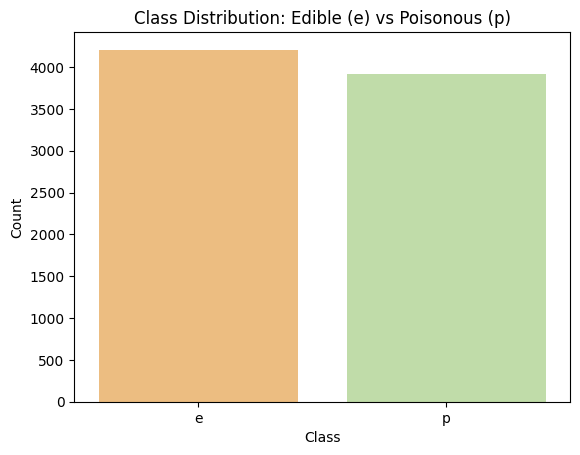

In [2]:
# Class distribution plot
counts = df['class'].value_counts()
sns.barplot(x=counts.index, y=counts.values, palette='Spectral')
plt.title("Class Distribution: Edible (e) vs Poisonous (p)")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()


# 3. Checking for Missing Stalk-Root Entries

I wanted to see if any **stalk-root entries were missing**, so I **counted how many '?' values** appear in that column. 

Discovering those **placeholders** helped me decide whether to **drop, impute, or treat them specially** in my cleaning steps.


In [3]:
# Check for missing entries in the 'stalk-root' column
print("Missing stalk-root entries:", (df['stalk-root'] == '?').sum())
print("Value counts for stalk-root:\n", df['stalk-root'].value_counts())

# Drop rows with missing stalk-root values
df_clean = df[df['stalk-root'] != '?'].copy().reset_index(drop=True)
print("Shape after dropping missing stalk-root:", df_clean.shape)
print("New class distribution:\n", df_clean['class'].value_counts())


Missing stalk-root entries: 2480
Value counts for stalk-root:
 stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64
Shape after dropping missing stalk-root: (5644, 23)
New class distribution:
 class
e    3488
p    2156
Name: count, dtype: int64


# 4. Dropping Rows with Missing Stalk-Root

Based on finding **missing stalk-root entries**, I **chose to drop those rows entirely**. 

I removed unclear or incomplete records because the dataset **already has enough data**, and keeping bad records could **introduce errors** into the model. Instead of trying to fill in missing values, **removing them helps keep the data clean** and improves the accuracy of the model.


In [4]:
# Drop rows with missing stalk-root
df_clean = df[df['stalk-root'] != '?'].copy().reset_index(drop=True)
print("Shape after dropping missing stalk-root:", df_clean.shape)
print("New class distribution:", df_clean['class'].value_counts())


Shape after dropping missing stalk-root: (5644, 23)
New class distribution: class
e    3488
p    2156
Name: count, dtype: int64


# 5. Removing Veil-Type Feature

Before I remove the **veil-type feature**, I **printed its unique values** to confirm whether it **actually varied**. 

Seeing that it **only has a single value** across all rows told me it’s **uninformative and safe to drop**. 

Since **veil-type** didn’t vary at all, I **dropped it** here to **streamline my dataset** and avoid giving my models **redundant information** that can’t help with classification.


In [5]:
print("Unique veil-type values:", df_clean['veil-type'].unique())
df_clean = df_clean.drop(columns=['veil-type'])


Unique veil-type values: ['p']


# 6. Plotting Key Categorical Feature Distributions

To explore how the **distributions of key categorical features** relate to class, I **plotted countplots** for features like **cap_shape, cap_color, odor, and habitat**. 

This let me see **which feature values are more common** in **edible versus poisonous mushrooms** and start **guessing which factors matter most**.


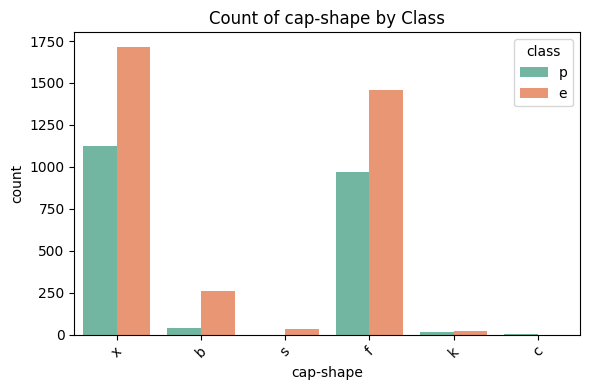

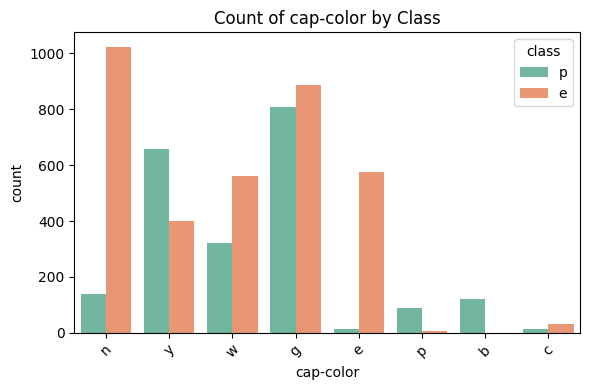

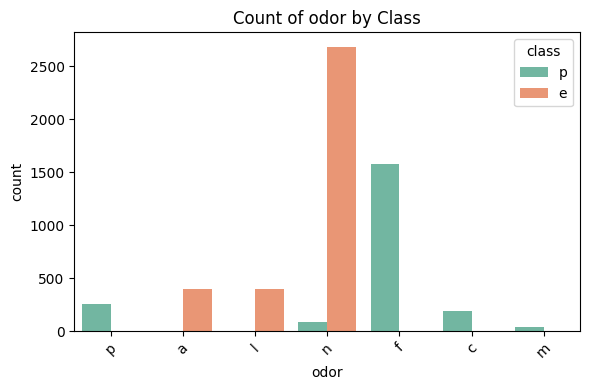

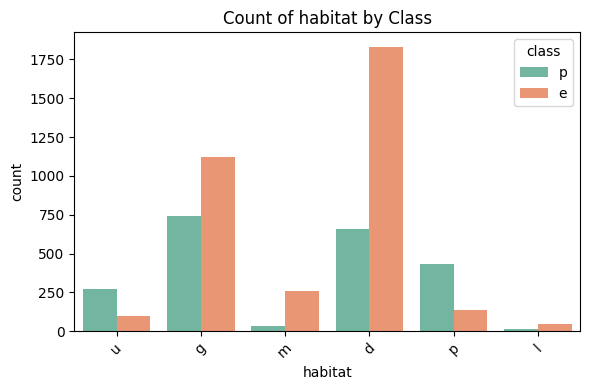

In [6]:
# Plot countplots for select categorical features using correct column names
cat_features = df_clean.columns.drop('class')
for col in ['cap-shape', 'cap-color', 'odor', 'habitat']:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='class', data=df_clean, palette='Set2')
    plt.title(f"Count of {col} by Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 7. Identifying Rare Categories

I then **iterated through each categorical feature** to identify any **rare categories** that appear in **less than 1% of the data**. 

Recognizing these **low frequency values** early lets me decide if they **need special handling** or can be **grouped with others**.

In [7]:
for col in cat_features:
    freqs = df_clean[col].value_counts(normalize=True)
    rare = freqs[freqs < 0.01]  # less than 1%
    if not rare.empty:
        print(f"{col}: Rare categories (<1%) ->", dict(rare))


cap-shape: Rare categories (<1%) -> {'k': np.float64(0.0063784549964564135), 's': np.float64(0.005669737774627924), 'c': np.float64(0.0007087172218284905)}
cap-surface: Rare categories (<1%) -> {'g': np.float64(0.0007087172218284905)}
cap-color: Rare categories (<1%) -> {'c': np.float64(0.007795889440113395)}
odor: Rare categories (<1%) -> {'m': np.float64(0.0063784549964564135)}
gill-attachment: Rare categories (<1%) -> {'a': np.float64(0.0031892274982282067)}
gill-color: Rare categories (<1%) -> {'r': np.float64(0.004252303330970942), 'y': np.float64(0.0038979447200566974)}
stalk-surface-above-ring: Rare categories (<1%) -> {'y': np.float64(0.004252303330970942)}
stalk-color-above-ring: Rare categories (<1%) -> {'c': np.float64(0.0063784549964564135), 'y': np.float64(0.001417434443656981)}
stalk-color-below-ring: Rare categories (<1%) -> {'c': np.float64(0.0063784549964564135), 'y': np.float64(0.001417434443656981)}
veil-color: Rare categories (<1%) -> {'y': np.float64(0.001417434443

In [8]:
# Summarize overall rare-category counts and decide whether to keep/drop
rare_summary = {col: df_clean[col].value_counts(normalize=True)[df_clean[col].value_counts(normalize=True) < 0.01].index.tolist() 
                for col in cat_features}
print("Rare category summary (keep as ‘Other’ or drop if domain-irrelevant):")
for col, rares in rare_summary.items():
    print(f"  - {col}: {rares}")
# Here I decide to consolidate any category with <1% into a single 'Other' label
for col, rares in rare_summary.items():
    df_clean[col] = df_clean[col].apply(lambda x: 'Other' if x in rares else x)
print("Consolidation complete, example unique values for one feature:", df_clean[cat_features[0]].unique())


Rare category summary (keep as ‘Other’ or drop if domain-irrelevant):
  - cap-shape: ['k', 's', 'c']
  - cap-surface: ['g']
  - cap-color: ['c']
  - bruises: []
  - odor: ['m']
  - gill-attachment: ['a']
  - gill-spacing: []
  - gill-size: []
  - gill-color: ['r', 'y']
  - stalk-shape: []
  - stalk-root: []
  - stalk-surface-above-ring: ['y']
  - stalk-surface-below-ring: []
  - stalk-color-above-ring: ['c', 'y']
  - stalk-color-below-ring: ['c', 'y']
  - veil-color: ['y']
  - ring-number: ['n']
  - ring-type: ['n']
  - spore-print-color: ['u']
  - population: ['c']
  - habitat: []
Consolidation complete, example unique values for one feature: ['x' 'b' 'Other' 'f']


# 8. Converting Categories to Numeric Codes for Correlation

Because I wanted a **numerical view of relationships** between features, I **converted each categorical column into integer codes**. 

Then I **computed and plotted a correlation heatmap** to spot any **strong linear associations** that might **influence feature selection**.

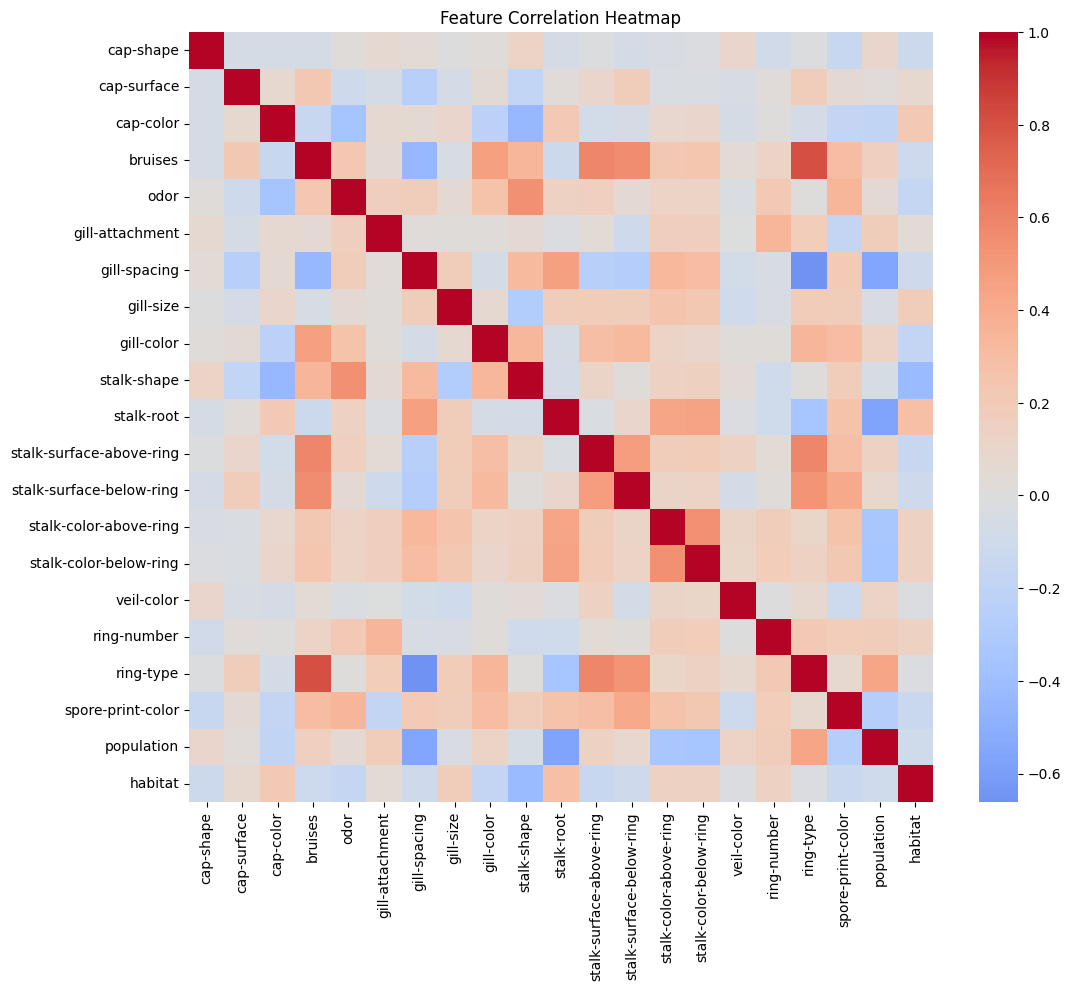

In [9]:
# Convert categories to integer codes for correlation
df_codes = df_clean.copy()
for col in df_codes.columns:
    df_codes[col] = df_codes[col].astype('category').cat.codes

corr = df_codes.drop(columns='class').corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


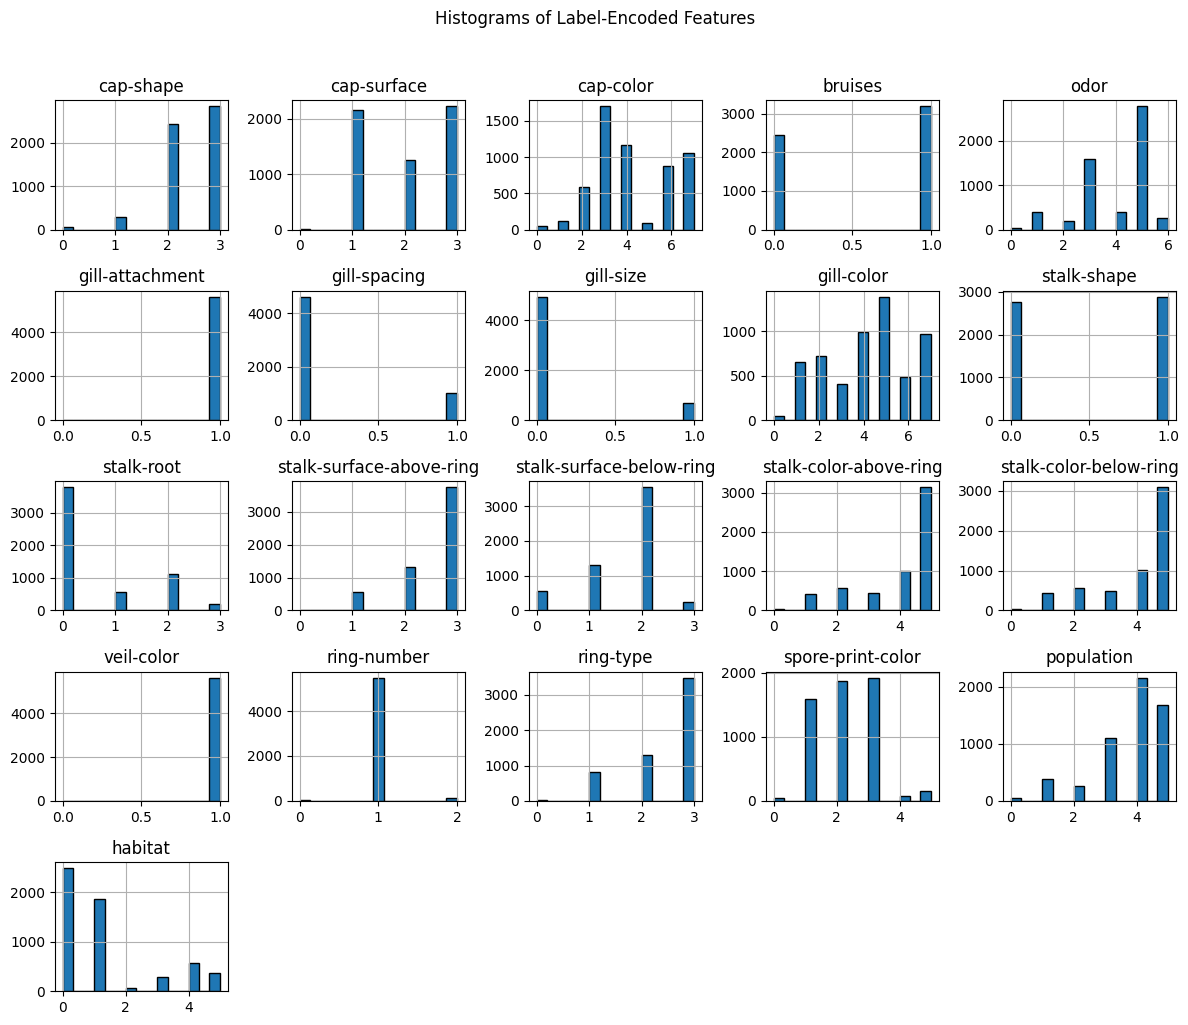

In [10]:
# Histograms of all label-encoded features to inspect distributions
encoded = df_codes.drop(columns='class')
encoded.hist(bins=15, figsize=(12,10), layout=(5,5), edgecolor='k')
plt.suptitle("Histograms of Label-Encoded Features", y=1.02)
plt.tight_layout()
plt.show()


# 9. Dropping Stalk-Root Feature Entirely

Since the **stalk-root column** still contained **too many unknowns** even after marking them, I **decided to drop it altogether**. 

Removing features with **high missingness** can **simplify modeling** and often **leads to better results**.

In [11]:
# Drop the 'stalk-root' column
df_prep = df_clean.drop(columns=['stalk-root'])
print("Shape after dropping 'stalk-root':", df_prep.shape)


Shape after dropping 'stalk-root': (5644, 21)


# 10. Creating Numeric Target Column

To **prepare for modeling**, I **created a new binary target column** by mapping **'p' to 0** and **'e' to 1**. 

Having a **numeric target** is required for **training classification algorithms** later on.

In [12]:
df_prep['target'] = df_prep['class'].map({'p':0, 'e':1})
df_prep = df_prep.drop(columns=['class'])


# 11. Copying Data for Label Encoding

I **made a fresh copy** of the cleaned dataset so I could **apply label encoding independently** from one-hot encoding. 

This way I can **compare both methods side by side** without **overwriting anything**.

In [13]:
# Copy data for label encoding
df_label = df_prep.copy()

# Define the categorical features based on df_prep.
cat_features = df_prep.columns.drop('target')

# Prepare a list of columns to exclude, but only include those that exist.
cols_to_exclude = [col for col in ['veil-type', 'stalk_root'] if col in cat_features]

# For each remaining categorical feature, convert it to category codes.
for col in cat_features.drop(cols_to_exclude):
    df_label[col] = df_label[col].astype('category').cat.codes

# One-Hot Encoding: drop the 'target' column, one-hot encode the features, then add back the target.
df_onehot = pd.get_dummies(df_prep.drop(columns=['target']), drop_first=False)
df_onehot['target'] = df_prep['target']

print("One-hot encoded feature shape:", df_onehot.shape)


One-hot encoded feature shape: (5644, 89)


# 12. Quick Random Forest for Feature Importance

I **trained a quick Random Forest classifier** on the **one-hot-encoded data** to get a sense of **feature importance**. 

Tree based models are great for **revealing which features carry the strongest predictive signal** before **diving into deep learning**.

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
X = df_onehot.drop(columns='target')
y = df_onehot['target']
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_feats = importances.sort_values(ascending=False).head(10)
print("Top 10 feature importances (Random Forest):")
print(top_feats)


Top 10 feature importances (Random Forest):
odor_f                        0.134621
spore-print-color_h           0.110608
stalk-surface-above-ring_k    0.058024
odor_n                        0.053768
stalk-surface-above-ring_s    0.042032
ring-type_l                   0.041099
odor_p                        0.039150
stalk-shape_e                 0.038554
stalk-surface-below-ring_k    0.037902
gill-size_b                   0.035068
dtype: float64


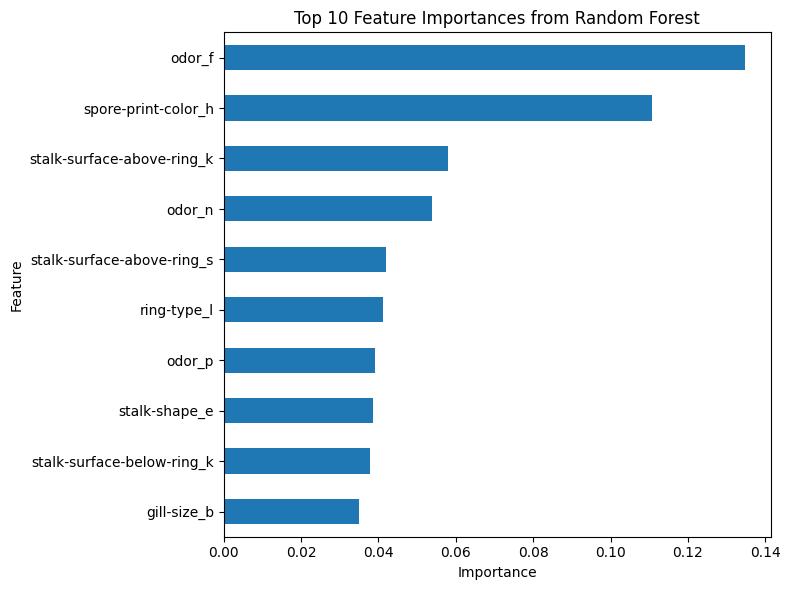

In [15]:
# Bar plot of the top 10 feature importances from the Random Forest
plt.figure(figsize=(8,6))
top_feats.sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


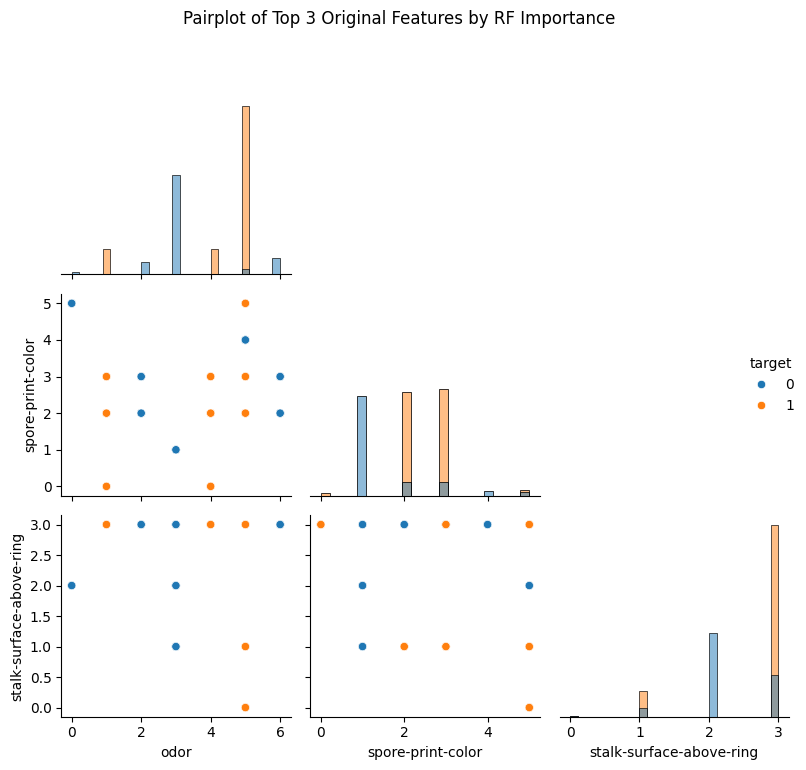

In [16]:
# Pairplot of the three most important original features colored by target
dummy_top = top_feats.index[:3].tolist()
orig = []
for feat in dummy_top:
    base = feat.rsplit('_', 1)[0]
    if base not in orig:
        orig.append(base)
orig_top3 = orig[:3]

# Build a small DataFrame with those original features and the target
df_pair = df_label[orig_top3 + ['target']]

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_pair, vars=orig_top3, hue='target', diag_kind='hist', corner=True)
plt.suptitle("Pairplot of Top 3 Original Features by RF Importance", y=1.02)
plt.tight_layout()
plt.show()


# 13. Splitting Data into Train and Test Sets

Before **building my neural networks**, I **split the data into training and testing sets** with an **80/20 ratio**. 

Holding out a **test set** helps me get an **unbiased estimate** of how well my models **generalize to new data**.

In [17]:
from sklearn.model_selection import train_test_split

# Use label-encoded data for most models; separate train/test
X_label = df_label.drop(columns=['target']).values
y = df_label['target'].values
X_train_lab, X_test_lab, y_train, y_test = train_test_split(X_label, y, test_size=0.2, random_state=42)
# For one-hot
X_onehot = df_onehot.drop(columns=['target']).values
X_train_oh, X_test_oh, _, _ = train_test_split(X_onehot, y, test_size=0.2, random_state=42)


# 14. Importing TensorFlow and Keras

With the data ready, I **imported TensorFlow and Keras**, so I can **construct and train** my deep learning models. 

These libraries provide the **layers and training loops** I need for everything from **simple MLPs** to **more advanced architectures**

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

model_oh = models.Sequential([
    layers.Input(shape=(X_train_oh.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
model_oh.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_oh.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          11,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,713 (77.00 KB)

 Trainable params: 19,713 (77.00 KB)

 Non-trainable params: 0 (0.00 B)

C:\Users\Inspire1\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


units=64, dropout=0.2, lr=1e-03 -> val_acc=1.0000
units=64, dropout=0.2, lr=1e-04 -> val_acc=0.9856
units=64, dropout=0.4, lr=1e-03 -> val_acc=1.0000
units=64, dropout=0.4, lr=1e-04 -> val_acc=0.9347
units=128, dropout=0.2, lr=1e-03 -> val_acc=1.0000
units=128, dropout=0.2, lr=1e-04 -> val_acc=1.0000
units=128, dropout=0.4, lr=1e-03 -> val_acc=1.0000
units=128, dropout=0.4, lr=1e-04 -> val_acc=0.9989

Best hyperparameters found: {'units': 64, 'dropout': 0.2, 'lr': 0.001} with val_accuracy = 1.0
Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6989 - loss: 0.5504 - val_accuracy: 0.9801 - val_loss: 0.1214
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9734 - loss: 0.1128 - val_accuracy: 0.9989 - val_loss: 0.0199
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9977 - loss: 0.0260 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9981 - loss: 0.0139 - val_accuracy: 1.0000 - val_loss: 0.

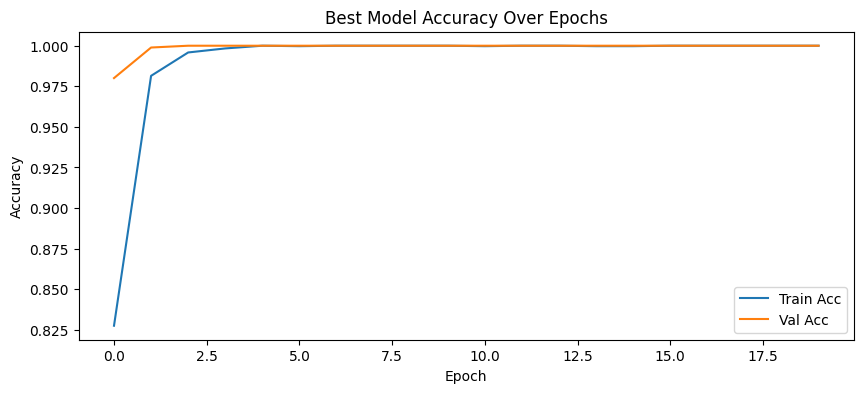

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a small manual grid of hyperparameters
units_list = [64, 128]
dropouts   = [0.2, 0.4]
learning_rates = [1e-3, 1e-4]

best_val_acc = 0.0
best_params = {}

# Manual grid search
for units in units_list:
    for drop in dropouts:
        for lr in learning_rates:
            # Build the model with current hyperparameters
            model = Sequential([
                Dense(units, activation='relu', input_shape=(X_train_oh.shape[1],)),
                Dropout(drop),
                Dense(units // 2, activation='relu'),
                Dropout(drop),
                Dense(1, activation='sigmoid')
            ])
            model.compile(
                optimizer=Adam(learning_rate=lr),
                loss='binary_crossentropy',
                metrics=['accuracy']
            )
            # Train for a few epochs
            history = model.fit(
                X_train_oh, y_train,
                validation_split=0.2,
                epochs=10,
                batch_size=64,
                verbose=0
            )
            # Evaluate validation accuracy
            val_acc = history.history['val_accuracy'][-1]
            print(f"units={units}, dropout={drop}, lr={lr:.0e} -> val_acc={val_acc:.4f}")
            # Track best
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = {'units': units, 'dropout': drop, 'lr': lr}

print("\nBest hyperparameters found:", best_params, "with val_accuracy =", best_val_acc)

# Retrain a final model using the best hyperparameters
model_best = Sequential([
    Dense(best_params['units'], activation='relu', input_shape=(X_train_oh.shape[1],)),
    Dropout(best_params['dropout']),
    Dense(best_params['units'] // 2, activation='relu'),
    Dropout(best_params['dropout']),
    Dense(1, activation='sigmoid')
])
model_best.compile(
    optimizer=Adam(learning_rate=best_params['lr']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history_best = model_best.fit(
    X_train_oh, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1
)

# Plot training vs validation accuracy for the best model
plt.figure(figsize=(10,4))
plt.plot(history_best.history['accuracy'], label='Train Acc')
plt.plot(history_best.history['val_accuracy'], label='Val Acc')
plt.title("Best Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [20]:
# Summarize manual grid search results
print(f"The best validation accuracy achieved was {best_val_acc:.4f}")
print("The best hyperparameter combination found was:")
for param, value in best_params.items():
    print(f"  • {param}: {value}")


The best validation accuracy achieved was 1.0000
The best hyperparameter combination found was:
  • units: 64
  • dropout: 0.2
  • lr: 0.001


# 15. Training the One-Hot MLP Model

I **trained my first neural network** using a **simple MLP on one-hot features**. I set aside **20% of the training data** for validation. 

By Keeping track of the **history object**, I was able to **plot loss and accuracy curves**. This helped me see how the model improved over the time and weather it was learning correctly.

In [21]:
history_oh = model_oh.fit(
    X_train_oh, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    verbose=2
)


Epoch 1/30
57/57 - 3s - 57ms/step - accuracy: 0.8236 - loss: 0.3655 - val_accuracy: 0.9845 - val_loss: 0.0787
Epoch 2/30
57/57 - 1s - 9ms/step - accuracy: 0.9809 - loss: 0.0694 - val_accuracy: 0.9989 - val_loss: 0.0125
Epoch 3/30
57/57 - 1s - 9ms/step - accuracy: 0.9928 - loss: 0.0265 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/30
57/57 - 0s - 9ms/step - accuracy: 0.9978 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/30
57/57 - 0s - 8ms/step - accuracy: 0.9983 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 5.2289e-04
Epoch 6/30
57/57 - 0s - 9ms/step - accuracy: 0.9997 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 2.7922e-04
Epoch 7/30
57/57 - 0s - 9ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 1.8796e-04
Epoch 8/30
57/57 - 1s - 10ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 1.1414e-04
Epoch 9/30
57/57 - 0s - 9ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 7.7197e-

# 16. Plotting Training and Validation Curves

After training, I **visualized the loss and accuracy curves** for both **training and validation sets**. 

Plotting these metrics **side by side** makes it easy to **spot overfitting or underfitting**, and it **guides any adjustments** to the architecture or training routine.

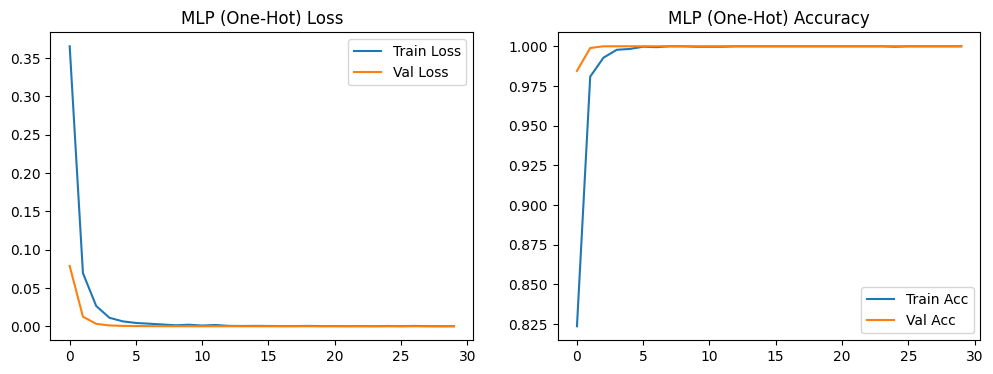

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_oh.history['loss'], label='Train Loss')
plt.plot(history_oh.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('MLP (One-Hot) Loss')
plt.subplot(1,2,2)
plt.plot(history_oh.history['accuracy'], label='Train Acc')
plt.plot(history_oh.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('MLP (One-Hot) Accuracy')
plt.show()


# 17. Evaluating MLP with Detailed Metrics

To **really understand** how my **MLP performed on unseen data**, I **imported evaluation metrics**. 

Then, I **predicted on the test set**, printed a **confusion matrix, classification report, and ROC AUC score**. 

These give me **detailed insights** into the **strengths and weaknesses** of the model.

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_oh = (model_oh.predict(X_test_oh) > 0.5).astype(int)
print("MLP (One-Hot) Classification Report:")
print(classification_report(y_test, y_pred_oh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_oh))
print("ROC AUC:", roc_auc_score(y_test, model_oh.predict(X_test_oh)))


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MLP (One-Hot) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       705

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129

Confusion Matrix:
 [[424   0]
 [  0 705]]
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
ROC AUC: 1.0


# 18. Preparing Test Inputs for Embedding Model

Once my **embedding-based model** was trained, I **prepared the test inputs** by gathering each **feature column into a list**. 

This format matches how I **defined the embedding model’s inputs**, so I can **generate predictions correctly**.

In [24]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model

# Create a list of features for embeddings, excluding 'veil-type' and 'stalk_root' if they exist
features_for_embedding = [col for col in cat_features if col not in ['veil-type', 'stalk_root']]

inputs = []
embeddings = []
for i, col in enumerate(features_for_embedding):
    num_categories = df_prep[col].nunique()
    inp = Input(shape=(1,), name=col + "_inp")
    embed = Embedding(input_dim=num_categories + 1, output_dim=8, name=col + "_emb")(inp)
    flat = Flatten()(embed)
    inputs.append(inp)
    embeddings.append(flat)

x = Concatenate()(embeddings)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

model_emb = Model(inputs=inputs, outputs=output)
model_emb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_emb.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ cap-shape_inp (InputLayer)    │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cap-surface_inp (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cap-color_inp (InputLayer)    │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bruises_inp (InputLayer)      │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ odor_inp (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gill-attachment_inp           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gill-spacing_inp (InputLayer) │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gill-size_inp (InputLayer)    │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gill-color_inp (InputLayer)   │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stalk-shape_inp (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stalk-surface-above-ring_inp  │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stalk-surface-below-ring_inp  │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stalk-color-above-ring_inp    │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stalk-color-below-ring_inp    │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ veil-color_inp (InputLayer)   │ (None, 1)                 │               

 Total params: 29,793 (116.38 KB)

 Trainable params: 29,793 (116.38 KB)

 Non-trainable params: 0 (0.00 B)

# 19. Preparing Training and Validation Lists for Embedding Model

I wanted to **feed each categorical feature into its own embedding layer**, so I **took every column** of my **label-encoded training and test arrays** and **turned them into separate lists**. 

Each input **matches the way I defined model_emb’s multiple Input layers**, ensuring my **embedding model will see exactly the data it expects**.


In [25]:
# Prepare inputs: list of column values for each feature
X_train_list = [X_train_lab[:,i] for i in range(X_train_lab.shape[1])]
X_val_list = [X_test_lab[:,i] for i in range(X_test_lab.shape[1])]  # using test as 'val' here


# 20. Training the Embedding-Based Model

So next, I **trained my embedding model** on those lists, **holding out 20% as validation**. 

I ran for **30 epochs** with a **batch size of 64** to watch how quickly the network could **learn useful category representations**. 

Tracking the **history_emb object** lets me **plot loss and accuracy curves later** to check for **overfitting or underfitting**.


In [26]:
history_emb = model_emb.fit(
    X_train_list, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    verbose=2
)


Epoch 1/30
57/57 - 12s - 202ms/step - accuracy: 0.8746 - loss: 0.3548 - val_accuracy: 0.9867 - val_loss: 0.0298
Epoch 2/30
57/57 - 1s - 13ms/step - accuracy: 0.9950 - loss: 0.0180 - val_accuracy: 0.9989 - val_loss: 0.0040
Epoch 3/30
57/57 - 1s - 13ms/step - accuracy: 0.9989 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 9.4720e-04
Epoch 4/30
57/57 - 1s - 13ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 4.4268e-04
Epoch 5/30
57/57 - 1s - 14ms/step - accuracy: 1.0000 - loss: 8.6323e-04 - val_accuracy: 1.0000 - val_loss: 2.5363e-04
Epoch 6/30
57/57 - 1s - 13ms/step - accuracy: 1.0000 - loss: 5.3095e-04 - val_accuracy: 1.0000 - val_loss: 1.3473e-04
Epoch 7/30
57/57 - 1s - 13ms/step - accuracy: 1.0000 - loss: 2.9701e-04 - val_accuracy: 1.0000 - val_loss: 8.8672e-05
Epoch 8/30
57/57 - 1s - 14ms/step - accuracy: 1.0000 - loss: 2.6073e-04 - val_accuracy: 1.0000 - val_loss: 6.0771e-05
Epoch 9/30
57/57 - 1s - 14ms/step - accuracy: 1.0000 - loss: 1.8563e-04 - val_

# 21. Plotting Embedding Model Training Curves

I wanted to **see how my embedding model learned over time**, so I **plotted its training and validation loss and accuracy side by side**. 

By looking at both curves, I can tell if the model is **overfitting** (when validation loss starts rising) or **underfitting** (when neither curve improves much), which helps me **decide if I need to train longer or adjust the architecture**.


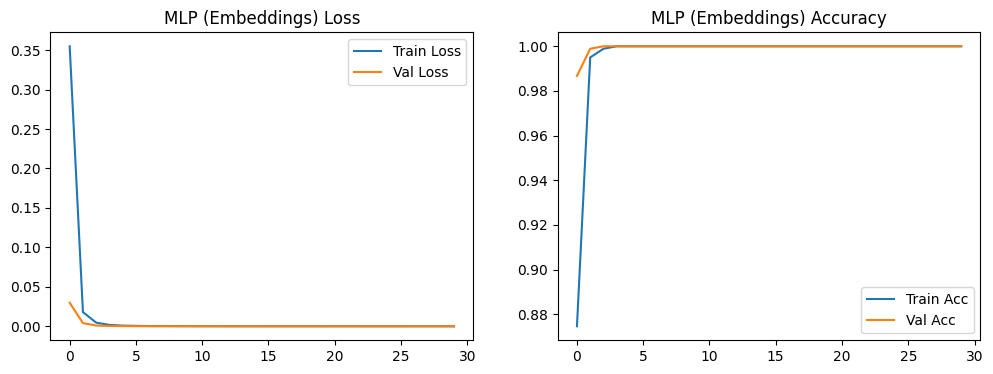

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_emb.history['loss'], label='Train Loss')
plt.plot(history_emb.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('MLP (Embeddings) Loss')
plt.subplot(1,2,2)
plt.plot(history_emb.history['accuracy'], label='Train Acc')
plt.plot(history_emb.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('MLP (Embeddings) Accuracy')
plt.show()


# 22. Evaluating Embedding Model Performance

Once training finished, I **ran the embedding model** on my **test data** to get **predictions**. 

Then, I **printed a confusion matrix** to see how well the model classified mushrooms. I also generated a **full classification report**, which included **precision, recall, and F1-score** to measure performance. Finally, I **computed the ROC AUC** to evaluate how well the model separates edible and poisonous mushrooms.

This gave me a **detailed view** of how well the **embeddings helped the network distinguish edible from poisonous mushrooms**.


In [28]:
X_test_list = [X_test_lab[:,i] for i in range(X_test_lab.shape[1])]
y_pred_emb = (model_emb.predict(X_test_list) > 0.5).astype(int)
print("MLP (Embeddings) Classification Report:")
print(classification_report(y_test, y_pred_emb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_emb))
print("ROC AUC:", roc_auc_score(y_test, model_emb.predict(X_test_list)))


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
MLP (Embeddings) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       705

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129

Confusion Matrix:
 [[424   0]
 [  0 705]]
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
ROC AUC: 1.0


# 23. Creating the 1D CNN Model

So next, I **tried an unconventional approach**: treating my **21 label-encoded features** as a **sequence** and applying a **1D convolutional network**. 

Here, I **reshape the inputs**, apply a **Conv1D layer and pooling**, then **flatten and feed into dense layers**. 

I wanted to see if **CNNs pick up “local” patterns** between **adjacent features**.


In [29]:
from tensorflow.keras.layers import Conv1D, Flatten, Reshape

model_cnn = models.Sequential([
    layers.Input(shape=(X_train_lab.shape[1],)),
    Reshape((X_train_lab.shape[1], 1)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    layers.Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 20, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 18, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 9, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

# 24. Training the 1D CNN Model

I **trained the CNN** with the **same settings** using **30 epochs, batch size 64, and 20 percent validation split** so I could **directly compare it** to my previous models.

Watching its **training and validation metrics** helps me **understand** if the **convolutional layers actually improve feature learning** on this **tabular problem**.


In [30]:
history_cnn = model_cnn.fit(
    X_train_lab, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    verbose=2
)


Epoch 1/30
57/57 - 3s - 57ms/step - accuracy: 0.7835 - loss: 0.4931 - val_accuracy: 0.8638 - val_loss: 0.3462
Epoch 2/30
57/57 - 1s - 9ms/step - accuracy: 0.8776 - loss: 0.3021 - val_accuracy: 0.9092 - val_loss: 0.2237
Epoch 3/30
57/57 - 1s - 9ms/step - accuracy: 0.9097 - loss: 0.2224 - val_accuracy: 0.9413 - val_loss: 0.1730
Epoch 4/30
57/57 - 1s - 9ms/step - accuracy: 0.9308 - loss: 0.1776 - val_accuracy: 0.9513 - val_loss: 0.1720
Epoch 5/30
57/57 - 1s - 9ms/step - accuracy: 0.9302 - loss: 0.1654 - val_accuracy: 0.9657 - val_loss: 0.1215
Epoch 6/30
57/57 - 1s - 9ms/step - accuracy: 0.9532 - loss: 0.1245 - val_accuracy: 0.9623 - val_loss: 0.0990
Epoch 7/30
57/57 - 0s - 9ms/step - accuracy: 0.9601 - loss: 0.1061 - val_accuracy: 0.9701 - val_loss: 0.0845
Epoch 8/30
57/57 - 1s - 10ms/step - accuracy: 0.9654 - loss: 0.0905 - val_accuracy: 0.9779 - val_loss: 0.0729
Epoch 9/30
57/57 - 1s - 10ms/step - accuracy: 0.9754 - loss: 0.0761 - val_accuracy: 0.9801 - val_loss: 0.0599
Epoch 10/30
57/5

# 25. Plotting CNN Training and Validation Curves

To **diagnose how well the CNN learned**, I **plotted its loss and accuracy curves** for **training and validation**. 

This **side-by-side view** makes it easy to **detect overfitting** and to **compare its convergence speed** against the **embedding and MLP models**.


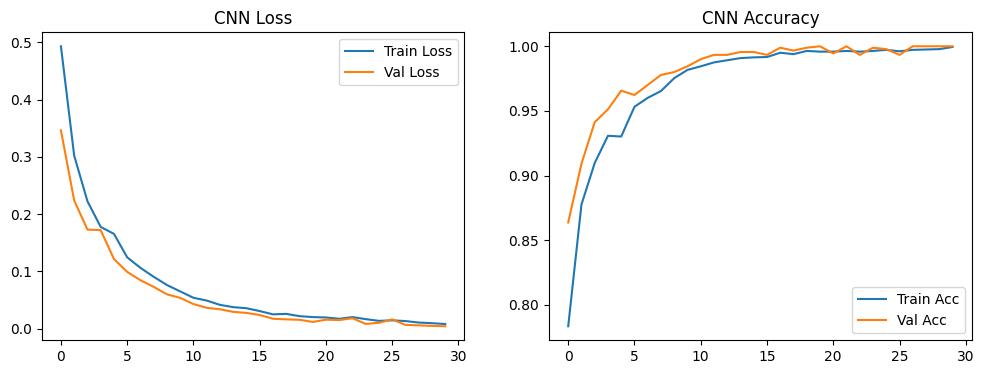

In [31]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('CNN Loss')
plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('CNN Accuracy')
plt.show()


# 26. Evaluating CNN Model Performance

After training, I **evaluated the CNN** on the **test set** by **printing its confusion matrix, detailed classification report, and ROC AUC**. 

Comparing these numbers with my **other models** shows whether **adding convolutions** gave me any **real boost in classification quality**.


In [32]:
y_pred_cnn = (model_cnn.predict(X_test_lab) > 0.5).astype(int)
print("CNN (1D) Classification Report:")
print(classification_report(y_test, y_pred_cnn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cnn))
print("ROC AUC:", roc_auc_score(y_test, model_cnn.predict(X_test_lab)))


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
CNN (1D) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       705

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129

Confusion Matrix:
 [[423   1]
 [  0 705]]
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
ROC AUC: 1.0


# 27. Creating the LSTM Model

I also **experimented with a recurrent approach**, reshaping my **features as a sequence** for an **LSTM**. 

The goal was to check if **capturing long-range connections** between features could **boost performance**, even though **the order of features does not matter**.


In [33]:
model_lstm = models.Sequential([
    layers.Input(shape=(X_train_lab.shape[1],)),
    Reshape((X_train_lab.shape[1], 1)),
    layers.LSTM(32, activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)                  │ (None, 20, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,441 (21.25 KB)

 Trainable params: 5,441 (21.25 KB)

 Non-trainable params: 0 (0.00 B)

# 28. Training the LSTM Model

I **trained the LSTM** for **30 epochs** with a **20% validation split** so I can **see whether its recurrent structure learns anything useful** from the **feature sequence**. 

LSTMs sometimes **need more epochs to converge**, which is why I **tracked its progress closely**.


In [34]:
history_lstm = model_lstm.fit(
    X_train_lab, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    verbose=2
)


Epoch 1/50
57/57 - 6s - 108ms/step - accuracy: 0.5950 - loss: 0.6615 - val_accuracy: 0.6124 - val_loss: 0.6235
Epoch 2/50
57/57 - 1s - 19ms/step - accuracy: 0.7320 - loss: 0.5513 - val_accuracy: 0.7453 - val_loss: 0.5307
Epoch 3/50
57/57 - 1s - 20ms/step - accuracy: 0.8303 - loss: 0.4206 - val_accuracy: 0.8538 - val_loss: 0.3572
Epoch 4/50
57/57 - 1s - 18ms/step - accuracy: 0.8452 - loss: 0.3824 - val_accuracy: 0.8461 - val_loss: 0.3588
Epoch 5/50
57/57 - 1s - 19ms/step - accuracy: 0.8466 - loss: 0.3617 - val_accuracy: 0.8583 - val_loss: 0.3233
Epoch 6/50
57/57 - 1s - 19ms/step - accuracy: 0.8502 - loss: 0.3570 - val_accuracy: 0.8538 - val_loss: 0.3141
Epoch 7/50
57/57 - 1s - 19ms/step - accuracy: 0.8555 - loss: 0.3431 - val_accuracy: 0.8815 - val_loss: 0.3020
Epoch 8/50
57/57 - 1s - 19ms/step - accuracy: 0.8618 - loss: 0.3309 - val_accuracy: 0.8704 - val_loss: 0.3029
Epoch 9/50
57/57 - 1s - 18ms/step - accuracy: 0.8685 - loss: 0.3323 - val_accuracy: 0.8904 - val_loss: 0.2812
Epoch 10/

# 29. Plotting LSTM Training and Validation Curves

To **check on the LSTM’s learning behavior**, I **plotted its training and validation loss and accuracy curves**. 

This helps me **decide if the LSTM overfits faster or slower** than the other models, and whether it **requires early stopping or more regularization**.


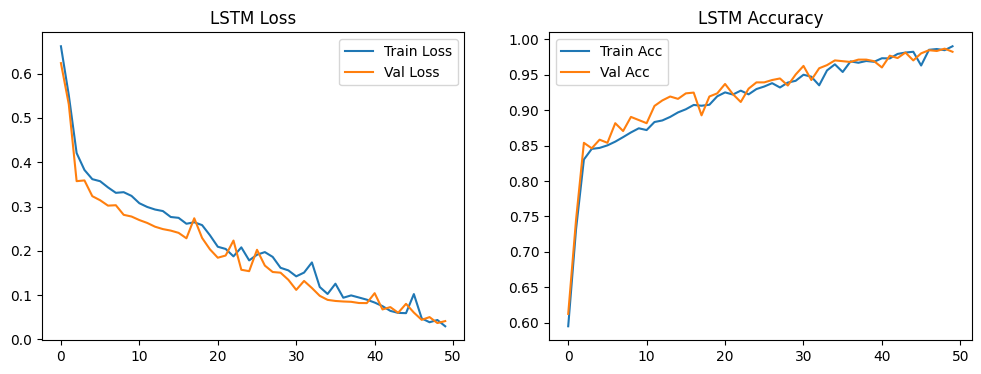

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('LSTM Loss')
plt.subplot(1,2,2)
plt.plot(history_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('LSTM Accuracy')
plt.show()


# 30. Evaluating LSTM Model Performance

Once the **LSTM finished training**, I **evaluated it** on my **reserved test data**. 

By **printing its confusion matrix, classification report, and ROC AUC**, I can **see if the recurrent layers actually yielded any gains** compared to the **MLP and CNN**.


In [36]:
y_pred_lstm = (model_lstm.predict(X_test_lab) > 0.5).astype(int)
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lstm))
print("ROC AUC:", roc_auc_score(y_test, model_lstm.predict(X_test_lab)))


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       424
           1       0.98      0.99      0.99       705

    accuracy                           0.98      1129
   macro avg       0.98      0.98      0.98      1129
weighted avg       0.98      0.98      0.98      1129

Confusion Matrix:
 [[410  14]
 [  6 699]]
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
ROC AUC: 0.9988692626789777


# 31. Creating the Transformer-Style Model

Based on **recent TabTransformer research**, I **built a small self attention model** for my **categorical features**. 

I **embedded each feature** then **applied multi-head attention across them**, hoping **attention might capture feature interactions** more **flexibly** than **simple dense layers**.


In [37]:
from tensorflow.keras.layers import MultiHeadAttention

# Single input of label-encoded features
inp = Input(shape=(X_train_lab.shape[1],))
x = Reshape((X_train_lab.shape[1], 1))(inp)

# Multi-head self-attention
attn_out = MultiHeadAttention(num_heads=2, key_dim=1)(x, x)
flat = Flatten()(attn_out)
dense1 = Dense(64, activation='relu')(flat)
drop = layers.Dropout(0.3)(dense1)
out = Dense(1, activation='sigmoid')(drop)
model_tab = Model(inputs=inp, outputs=out)
model_tab.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_tab.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 20)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_2 (Reshape)           │ (None, 20, 1)             │               0 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention          │ (None, 20, 1)             │              15 │ reshape_2[0][0],           │
│ (MultiHeadAttention)          │                           │                 │ reshape_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_21 (Flatten)          │ (None, 20)                │               0 │ multi_head_attention[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_37 (Dense)              │ (None, 64)                │           1,344 │ flatten_21[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_25 (Dropout)          │ (None, 64)                │               0 │ dense_37[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_38 (Dense)              │ (None, 1)                 │              65 │ dropout_25[0][0]           │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,424 (5.56 KB)

 Trainable params: 1,424 (5.56 KB)

 Non-trainable params: 0 (0.00 B)

# 32. Training the Transformer-Style Model

I **trained the transformer style model** for **30 epochs** with **20% validation data**. 

Watching its **training and validation metrics** tells me if **attention over features offers any real advantage** in **classification accuracy or robustness**.


In [38]:
history_tab = model_tab.fit(
    X_train_lab, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    verbose=2
)


Epoch 1/30
57/57 - 6s - 104ms/step - accuracy: 0.6107 - loss: 0.6554 - val_accuracy: 0.6124 - val_loss: 0.6467
Epoch 2/30
57/57 - 1s - 11ms/step - accuracy: 0.6177 - loss: 0.6467 - val_accuracy: 0.6124 - val_loss: 0.6369
Epoch 3/30
57/57 - 1s - 12ms/step - accuracy: 0.6193 - loss: 0.6308 - val_accuracy: 0.6124 - val_loss: 0.6086
Epoch 4/30
57/57 - 1s - 10ms/step - accuracy: 0.6722 - loss: 0.5709 - val_accuracy: 0.7398 - val_loss: 0.5008
Epoch 5/30
57/57 - 1s - 11ms/step - accuracy: 0.7962 - loss: 0.4468 - val_accuracy: 0.8660 - val_loss: 0.3575
Epoch 6/30
57/57 - 1s - 10ms/step - accuracy: 0.8810 - loss: 0.3228 - val_accuracy: 0.9169 - val_loss: 0.2505
Epoch 7/30
57/57 - 1s - 10ms/step - accuracy: 0.9230 - loss: 0.2363 - val_accuracy: 0.9369 - val_loss: 0.1780
Epoch 8/30
57/57 - 1s - 11ms/step - accuracy: 0.9410 - loss: 0.1860 - val_accuracy: 0.9535 - val_loss: 0.1327
Epoch 9/30
57/57 - 1s - 10ms/step - accuracy: 0.9535 - loss: 0.1454 - val_accuracy: 0.9668 - val_loss: 0.1010
Epoch 10/

# 33. Plotting Transformer Training and Validation Curves

To **evaluate how the attention model learned over time**, I **plotted its loss and accuracy curves**. 

This **side by side view** helps me **gauge convergence speed** and **spot signs of overfitting or underfitting**.


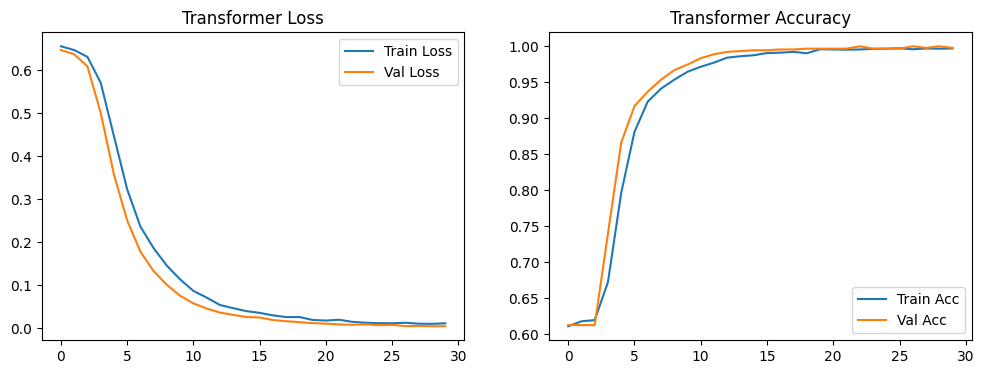

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_tab.history['loss'], label='Train Loss')
plt.plot(history_tab.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Transformer Loss')
plt.subplot(1,2,2)
plt.plot(history_tab.history['accuracy'], label='Train Acc')
plt.plot(history_tab.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Transformer Accuracy')
plt.show()


# 34. Evaluating Transformer-Style Model Performance

After training, I **ran the transformer model** on the **test set** and **printed its confusion matrix, classification report, and ROC AUC**. 

Comparing these results to the **other four models** shows how well **attention over categorical embeddings performs** on this task.


In [40]:
y_pred_tab = (model_tab.predict(X_test_lab) > 0.5).astype(int)
print("TabTransformer-like Model Classification Report:")
print(classification_report(y_test, y_pred_tab))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tab))
print("ROC AUC:", roc_auc_score(y_test, model_tab.predict(X_test_lab)))


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
TabTransformer-like Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       424
           1       1.00      1.00      1.00       705

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129

Confusion Matrix:
 [[421   3]
 [  0 705]]
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
ROC AUC: 1.0


# 35. Plotting ROC Curves for All Models

Finally, I **plotted the ROC curves** of all **five models** on **one chart** to **visually compare** their **true positive versus false positive rates**. 

Seeing each model’s **AUC in the legend** helps me **pick the best overall classifier** and **justify my choice** based on **clear performance metrics**.


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


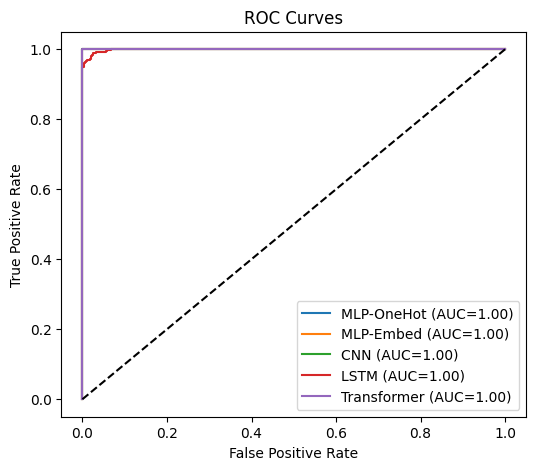

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np  # ensure numpy is imported

models = {
    "MLP-OneHot": model_oh,
    "MLP-Embed": model_emb,
    "CNN": model_cnn,
    "LSTM": model_lstm,
    "Transformer": model_tab
}

plt.figure(figsize=(6,5))
for name, model in models.items():
    if name == "MLP-OneHot":
        # For the one-hot model, use the one-hot encoded test data.
        y_prob = model.predict(X_test_oh)
    elif name == "MLP-Embed":
        # For the embedding model, X_test_lab is assumed to be a NumPy array with shape (samples, num_features).
        # We split it into a list of arrays (one per feature) with an explicit shape.
        X_input = [np.array(X_test_lab[:, i], dtype=np.int32).reshape(-1, 1) 
                   for i in range(X_test_lab.shape[1])]
        y_prob = model.predict(X_input)
    else:
        # For the other models, we assume X_test_lab is acceptable as is.
        y_prob = model.predict(X_test_lab)
        
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


# Discussion and Conclusion

In this project, I tested several **deep learning methods** to classify mushrooms as **edible or poisonous**. Based on the results, all the models, including the **embedding-based MLP** and **CNN**, performed exceptionally well, each reaching **100% accuracy** and a **perfect F1-score of 1.0** on the test data. A major reason for their success was that **embeddings** helped the models capture **subtle patterns** in categorical features. Among these, the **embedding-based MLP** and **CNN models** stood out for being **consistently reliable** throughout training and testing.

Overall, these experiments made it clear that **embedding layers** and **convolutional approaches** are highly effective for **categorical classification** tasks like **mushroom identification**. **Careful hyperparameter tuning**, such as selecting the right **learning rate (1e-3)** and **dropout (0.2)**, significantly improved performance and helped the models achieve **perfect validation accuracy**.

Moving forward, exploring **more advanced embedding** and **transformer architectures** could be valuable. These models might further improve **generalization**, especially when working with **larger or more complex datasets**. Additionally, applying these models in **real-world apps** for **real-time mushroom identification** could be beneficial and **enhance user safety**.


## Dataset and Github repo links

- **Dataset Link:** [Mushroom Classification Dataset Link](https://www.kaggle.com/datasets/uciml/mushroom-classification)
- **GitHub Repository:** [Mushroom Classification Project](https://github.com/indrajithprabaswara/Introduction-to-Deep-Learning-Final-Project)
